In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [17]:
#input file
df=pd.read_csv(r"/Users/xchen2/Documents/sysco_folder/Sysco Case Study/Sales Transactions - 2014.csv")
df2=pd.read_csv(r"/Users/xchen2/Documents/sysco_folder/Sysco Case Study/Sales Transactions - 2015.csv")
frames = [df,df2]
whole_pd = pd.concat(frames)
print 'total transaction number',whole_pd.shape[0]

#add a column for each transcation and count the number of transcation for each customer and each item
whole_pd['rates']=whole_pd['Customer Number'].map(lambda x: 1 )
group_pd=whole_pd.groupby(by=['Customer Number','Item Number'])['rates'].sum()
print 'number of user-item pairs',len(group_pd)

ItemIDs= whole_pd['Item Number'].unique()
userIDs = whole_pd['Customer Number'].unique()

print 'total Items in training',len(ItemIDs)
print 'total users in training',len(userIDs)

category_name = whole_pd['NPD Sysco Segmentation'].unique()
print 'customer category number',len(category_name)

item_category_name = whole_pd['CMIM Id'].unique()
print 'item category number',len(item_category_name)

total transaction number 3076711
number of user-item pairs 329899
total Items in training 20350
total users in training 2485
customer category number 64
item ategory number 3235


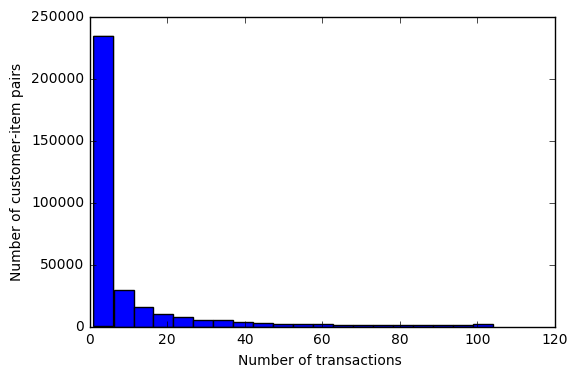

In [13]:
#examine the distribution of transcation time for each item for each user
all_values = group_pd.get_values()
plt.hist(all_values,20)
plt.xlabel('Number of transactions ')
plt.ylabel('Number of customer-item pairs')
plt.show()

In [19]:
#examine test data

test_df=pd.read_csv(r"/Users/xchen2/Documents/sysco_folder/Sysco Case Study/Sales Transactions - 2016.csv")
test_df['rates']=test_df['Customer Number'].map(lambda x: 1 )
group_test_pd=test_df.groupby(by=['Customer Number','Item Number'])['rates'].sum()
test_customerIDs = test_df['Customer Number'].unique()
test_itemIDs = test_df['Item Number'].unique()
new_customerIDs = list(set(test_customerIDs)-set(userIDs))
print 'total transaction in test',test_df.shape[0]
print 'total customer in test',len(test_customerIDs)
print 'total item in test',len(test_itemIDs)
print 'new item in test',len(set(test_itemIDs)-set(ItemIDs))
print 'new user in test',len(new_customerIDs)

total transaction in test 1548497
total customer in test 1991
total item in test 15295
new item in test 3673
new user in test 473
